In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
true_ages = [1,2,3,4,6,7]
age_dfs=[]
for i in true_ages:
    this_df = pd.read_csv('Age_results/'+str(i)+'Gyr.csv')
    this_df['true_mean_age'] = [i]
    this_df['true_spread_age'] = [0.1]
    this_df['true_mean_feh'] = [0.0]
    this_df['true_mean_Y'] = [0.28]
    this_df['true_mean_MLT'] = [1.9]
    age_dfs.append(this_df)
age_df = pd.concat(age_dfs)

In [51]:
true_fehs = [-0.6,0.0,0.4]
feh_dfs=[]
for i in true_fehs:
    this_df = pd.read_csv('feh_results/'+str(i)+'dex.csv')
    this_df['true_mean_age'] = [3]
    this_df['true_spread_age'] = [0.1]
    this_df['true_mean_feh'] = [i]
    this_df['true_mean_Y'] = [0.28]
    this_df['true_mean_MLT'] = [1.9]
    feh_dfs.append(this_df)
feh_df = pd.concat(feh_dfs)

In [55]:
def plotBias1(ax, df, x, parameter, colour, label):
    est = df[parameter+'_est']
    true = df['true_'+parameter]
    low_err = df[parameter+'_low_err']
    high_err = df[parameter+'_high_err']
    ratio = (est-true)/true
    ratio_err = [low_err/true,high_err/true]
    ax.plot(x, ratio, color=colour, label=label, zorder=1)
    ax.errorbar(x, ratio, yerr=ratio_err, fmt='.', color=colour,zorder=2)

def plotBias2(ax, df, x, parameter, xlabel, ylabel, title):
    est = df[parameter+'_est']
    true = df['true_'+parameter]
    diff = est-true
    ax.plot(x, diff, color='blue', zorder=2)
    upper_dots = diff+df[parameter+'_high_err']
    lower_dots = diff-df[parameter+'_low_err']
    dots = np.concatenate([upper_dots,lower_dots[::-1]])
    xs = np.concatenate([x,x[::-1]])
    ax.fill(xs, dots, color='lightgrey',zorder=0)
    ax.hlines(0, min(x), max(x), 'k', ls='--', zorder=1)
    ax.set_xlim([min(x),max(x)])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

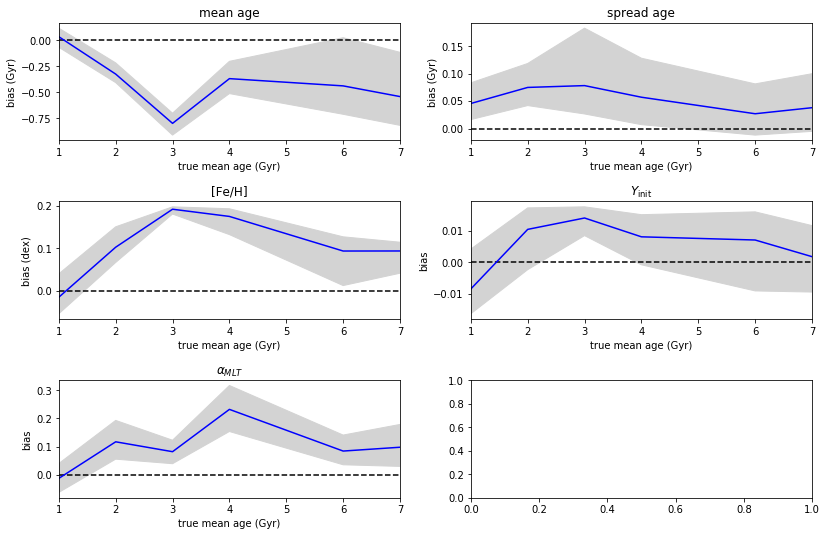

In [56]:
#age bias trends
fig,ax = plt.subplots(3,2, figsize=[12,8])
fig.tight_layout(pad=4.0)
x = age_df['true_mean_age']

plotBias2(ax[0][0], age_df, x, 'mean_age', 'true mean age (Gyr)', 'bias (Gyr)', 'mean age')
plotBias2(ax[0][1], age_df, x, 'spread_age', 'true mean age (Gyr)', 'bias (Gyr)', 'spread age')
plotBias2(ax[1][0], age_df, x, 'mean_feh', 'true mean age (Gyr)', 'bias (dex)', '[Fe/H]')
plotBias2(ax[1][1], age_df, x, 'mean_Y', 'true mean age (Gyr)', 'bias', r'$Y_{\rm init}$')
plotBias2(ax[2][0], age_df, x, 'mean_MLT', 'true mean age (Gyr)', 'bias', r'$\alpha_{MLT}$')

plt.show()

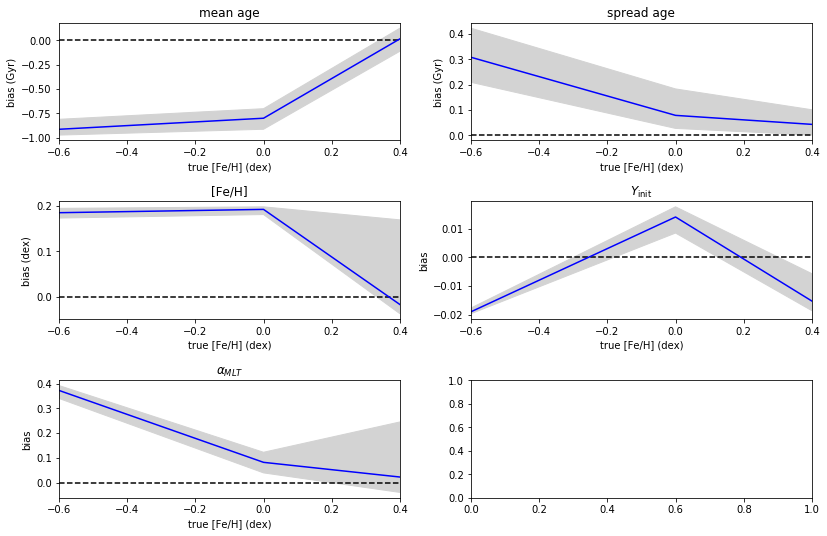

In [57]:
#feh bias trends
fig,ax = plt.subplots(3,2, figsize=[12,8])
fig.tight_layout(pad=4.0)
x = feh_df['true_mean_feh']

plotBias2(ax[0][0], feh_df, x, 'mean_age', 'true [Fe/H] (dex)', 'bias (Gyr)', 'mean age')
plotBias2(ax[0][1], feh_df, x, 'spread_age', 'true [Fe/H] (dex)', 'bias (Gyr)', 'spread age')
plotBias2(ax[1][0], feh_df, x, 'mean_feh', 'true [Fe/H] (dex)', 'bias (dex)', '[Fe/H]')
plotBias2(ax[1][1], feh_df, x, 'mean_Y', 'true [Fe/H] (dex)', 'bias', r'$Y_{\rm init}$')
plotBias2(ax[2][0], feh_df, x, 'mean_MLT', 'true [Fe/H] (dex)', 'bias', r'$\alpha_{MLT}$')

plt.show()